In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 39.1 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 200.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 48.4 MB/s eta 0:00:00 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=defd984fe9a07d7a5c4a72c38df0d136d1883c48365fc0f0978f7acdc0b7df2c
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=303862 sha256=f40174b78adb5185a7466ee2487f25998bb7c364b78f19806cfe2983d2fe3d6e
  Stored in directory: /home/jupyterlab/.cache/pip/whee

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

In [7]:
# Create a ticker object for Tesla
ticker_symbol = "TSLA"
tesla = yf.Ticker(ticker_symbol)

# Display basic information about Tesla
tesla.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive; and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [8]:
# Using the ticker object to extract historical stock data
tesla_data = tesla.history(period="max")

# Display the first few rows of the dataframe
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [10]:
# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [12]:
# Import the requests library
import requests

# Download the webpage and save its text content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Display the first 500 characters to verify content
print(html_data[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


In [13]:
# Install BeautifulSoup if it's not already installed
!pip install bs4 --quiet

from bs4 import BeautifulSoup

# Parse the HTML data
soup = BeautifulSoup(html_data, "html.parser")   # or use "html5lib" if available

# Quick check: print the title
print(soup.title)

<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>


In [15]:
!pip install bs4 --quiet

In [20]:
import pandas as pd
from bs4 import BeautifulSoup

# 1. Create an Empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# 2. Parse the HTML (assuming html_data already exists from requests.get(...).text)
soup = BeautifulSoup(html_data, "html.parser")

# 3. Find the Relevant Table — look for the one that has "Tesla Quarterly Revenue" in it
tables = soup.find_all("table")

target_table = None
for table in tables:
    if table.find("th") and "Tesla Quarterly Revenue" in table.text:
        target_table = table
        break

# Safety check
if target_table is not None:
    # 4. Iterate Through Rows in the Table Body
    tbody = target_table.find("tbody")
    rows = tbody.find_all("tr")

    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            # 5. Extract Data from Columns
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()

            # Skip blank rows
            if revenue == "" or revenue is None:
                continue

            # 6. Append Data to the DataFrame
            tesla_revenue = pd.concat(
                [tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})],
                ignore_index=True
            )

# Optional: clean the Revenue column (remove $ and ,)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "", regex=False)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "", regex=False)

# Show result
tesla_revenue.head()


,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [22]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27


In [24]:
# Create a ticker object for GameStop
ticker_symbol = "GME"
gme = yf.Ticker(ticker_symbol)

# Display basic information about GameStop
gme.info

{'address1': '625 Westport Parkway',
 'city': 'Grapevine',
 'state': 'TX',
 'zip': '76051',
 'country': 'United States',
 'phone': '817 424 2000',
 'website': 'https://www.gamestop.com',
 'industry': 'Specialty Retail',
 'industryKey': 'specialty-retail',
 'industryDisp': 'Specialty Retail',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and e-commerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, and gaming headsets; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts. The company operates stores and

In [25]:
# Using the ticker object to extract historical stock data for GameStop
gme_data = gme.history(period="max")

# Display the first few rows to verify
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [26]:
# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [27]:
# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Download the webpage and save the text
html_data_2 = requests.get(url).text

# Display the first few characters to verify the content
print(html_data_2[:500])

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


In [28]:
# Parse the HTML for the GameStop page
soup_2 = BeautifulSoup(html_data_2, "html.parser")   # or use "html5lib" if it's installed

# Quick check
print(soup_2.title)

<title>GameStop Revenue 2006-2020 | GME | MacroTrends</title>


In [30]:
soup_2 = BeautifulSoup(html_data_2, "html.parser")

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_data, revenue_data, stock_name):
    # 1. make sure dates are datetime
    stock_data = stock_data.copy()
    revenue_data = revenue_data.copy()

    stock_data["Date"] = pd.to_datetime(stock_data["Date"], errors="coerce")
    revenue_data["Date"] = pd.to_datetime(revenue_data["Date"], errors="coerce")

    # 2. drop timezone if any (this fixes the America/New_York error)
    stock_data["Date"] = stock_data["Date"].dt.tz_localize(None)
    revenue_data["Date"] = revenue_data["Date"].dt.tz_localize(None)

    # 3. filter to June 2021 (lab requirement)
    stock_data = stock_data[stock_data["Date"] <= "2021-06-14"]
    revenue_data = revenue_data[revenue_data["Date"] <= "2021-04-30"]

    # 4. make sure revenue is numeric
    revenue_data["Revenue"] = pd.to_numeric(revenue_data["Revenue"], errors="coerce")
    revenue_data = revenue_data.dropna(subset=["Revenue"])

    # 5. plot
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data["Date"], stock_data["Close"])
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($)")
    ax1.set_title(f"{stock_name} Stock Price and Revenue")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"])
    ax2.set_ylabel("Revenue ($)")

    plt.show()

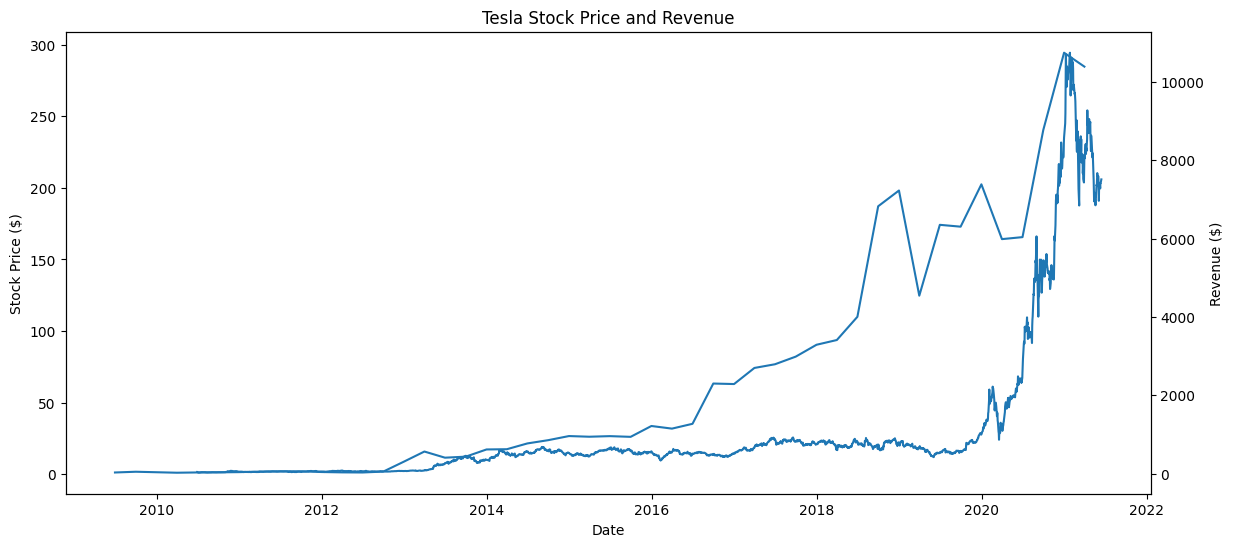

In [42]:
make_graph(tesla_data, tesla_revenue, "Tesla")

In [45]:
!pip install lxml --quiet
import pandas as pd

# Extract tables from the HTML (assuming html_data_2 already exists)
tables = pd.read_html(html_data_2)

# The GameStop Quarterly Revenue table is at index 1
gme_revenue = tables[1]

# Rename columns
gme_revenue.columns = ['Date', 'Revenue']

# Clean and filter the data
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\$', '', regex=True)
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
gme_revenue.dropna(subset=['Revenue'], inplace=True)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])


In [46]:
tables = pd.read_html(html_data_2)
gme_revenue = tables[1]


In [48]:
import pandas as pd

# 1) make sure html_data_2 exists (you already did requests.get(...).text)
# if not:
# import requests
# html_data_2 = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text

# 2) read the tables (now that lxml/bs4 is installed)
tables = pd.read_html(html_data_2)

# 3) the GME quarterly revenue table is at index 1
gme_revenue = tables[1]

# 4) rename the columns to what your make_graph expects
# print(gme_revenue.columns)  # <- you can check what they were
gme_revenue.columns = ["Date", "Revenue"]

# 5) clean the data
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# remove $ and ,
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)

# convert to numeric
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue.dropna(subset=["Revenue"], inplace=True)

# make Date real datetime
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"], errors="coerce")

# (optional) show to confirm
print(gme_revenue.tail())



         Date  Revenue
57 2006-01-31     1667
58 2005-10-31      534
59 2005-07-31      416
60 2005-04-30      475
61 2005-01-31      709


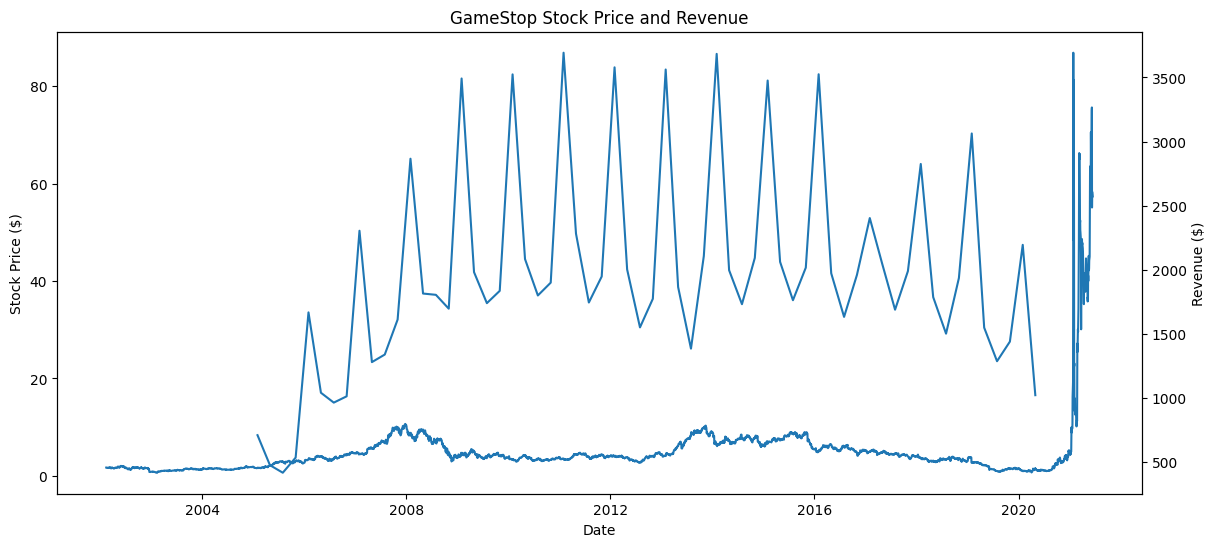

In [49]:
make_graph(gme_data, gme_revenue, "GameStop")


In [50]:
# Display the last 5 rows of the gme_revenue DataFrame
gme_revenue.tail()


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [51]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
51,2009-09-30,46
52,2009-06-30,27
